<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [69]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-06-26 06:43:38--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.2’

m4_survey_data.sqli 100%[===================>]  34.98M  33.3MB/s    in 1.0s    

2024-06-26 06:43:40 (33.3 MB/s) - ‘m4_survey_data.sqlite.2’ saved [36679680/36679680]



Connect to the database.


In [71]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

COUNT(*)
0     11398

## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


Table_Name
0                 EduOther
1                  DevType
2                  LastInt
3               JobFactors
4                 WorkPlan
5            WorkChallenge
6       LanguageWorkedWith
7   LanguageDesireNextYear
8       DatabaseWorkedWith
9   DatabaseDesireNextYear
10      PlatformWorkedWith
11  PlatformDesireNextYear
12      WebFrameWorkedWith
13  WebFrameDesireNextYear
14      MiscTechWorkedWith
15  MiscTechDesireNextYear
16              DevEnviron
17              Containers
18               SOVisitTo
19            SONewContent
20                  Gender
21               Sexuality
22               Ethnicity
23                  master

## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

Age  count
0    NaN    287
1   16.0      3
2   17.0      6
3   18.0     29
4   19.0     78
5   20.0    109
6   21.0    203
7   22.0    406
8   23.0    581
9   24.0    679
10  25.0    738
11  26.0    720
12  27.0    724
13  28.0    787
14  29.0    697
15  30.0    651
16  31.0    531
17  32.0    489
18  33.0    483
19  34.0    395
20  35.0    393
21  36.0    308
22  37.0    280
23  38.0    279
24  39.0    232
25  40.0    187
26  41.0    136
27  42.0    162
28  43.0    100
29  44.0     95
30  45.0     85
31  46.0     66
32  47.0     68
33  48.0     64
34  49.0     66
35  50.0     57
36  51.0     29
37  52.0     41
38  53.0     32
39  54.0     26
40  55.0     13
41  56.0     16
42  57.0     11
43  58.0     12
44  59.0     11
45  60.0      2
46  61.0     10
47  62.0      5
48  63.0      7
49  65.0      2
50  66.0      1
51  67.0      1
52  69.0      1
53  71.0      2
54  72.0      1
55  99.0      1

In [89]:
# Devtype
QUERY = """
SELECT DevType,COUNT(*) as count
FROM DevType
group by DevType
order by count desc
"""
Dev_type = pd.read_sql_query(QUERY,conn)
Dev_type.head()

DevType  count
0                          Developer, full-stack   6928
1                            Developer, back-end   6290
2                           Developer, front-end   3920
3  Developer, desktop or enterprise applications   2575
4                              Developer, mobile   1959

## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

In [12]:
QUERY = """
SELECT Respondent,Age,ConvertedComp,WorkWeekHrs,CodeRevHrs,MainBranch
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.head()

Respondent   Age  ConvertedComp  WorkWeekHrs  CodeRevHrs  \
0           4  22.0        61000.0         80.0         NaN   
1           9  23.0        95179.0         32.0        12.0   
2          13  28.0        90000.0         40.0         5.0   
3          16  26.0       455352.0         40.0         NaN   
4          17  29.0        65277.0         45.0         5.0   

                       MainBranch  
0  I am a developer by profession  
1  I am a developer by profession  
2  I am a developer by profession  
3  I am a developer by profession  
4  I am a developer by profession

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


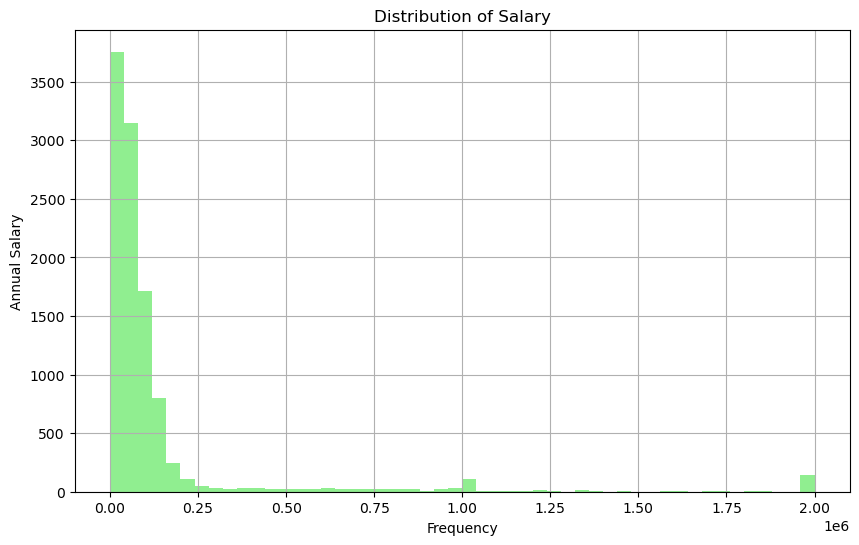

In [19]:
# your code goes here
# Import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Plot the Histogram
plt.figure(figsize=(10, 6))
df["ConvertedComp"].hist(bins = 50, color = 'lightgreen', grid = True)

#Labels and title
plt.ylabel('Annual Salary')
plt.xlabel('Frequency')
plt.title('Distribution of Salary')

plt.show()


### Box Plots


Plot a box plot of `Age.`


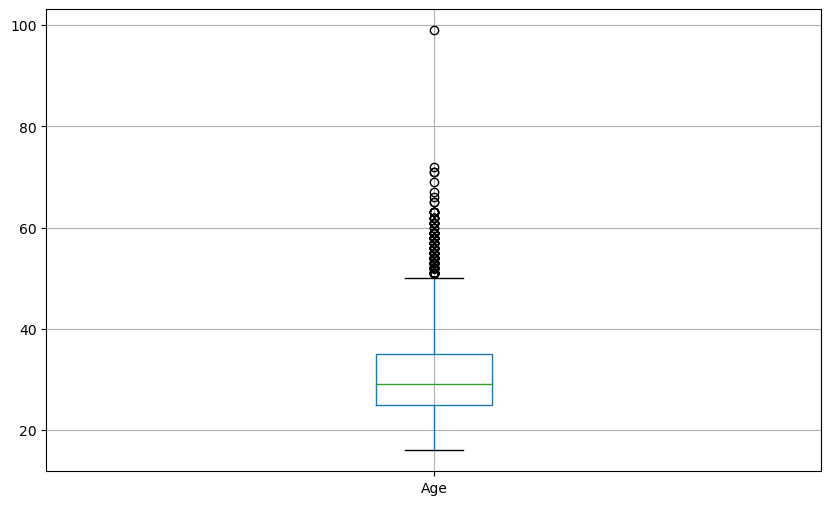

In [17]:
# your code goes here
plt.figure(figsize=(10, 6))
df.boxplot(column = 'Age',return_type='axes')

plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

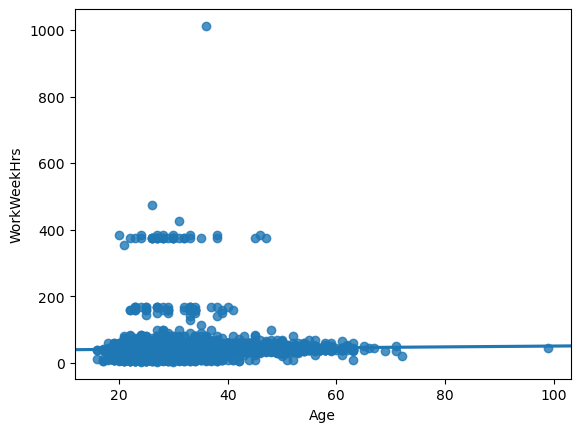

In [41]:
# your code goes here
sns.regplot(x='Age', y='WorkWeekHrs', data = df)


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



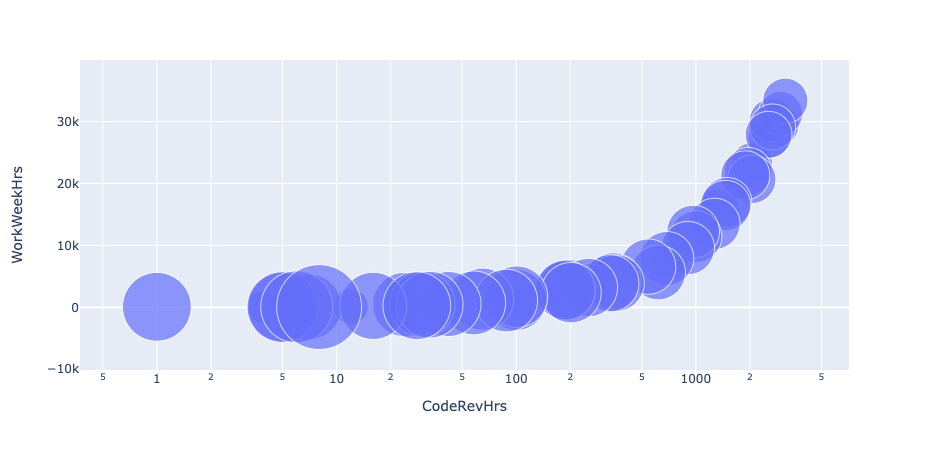

In [66]:
# your code goes here
QUERY = """
SELECT Age,WorkWeekHrs,CodeRevHrs
FROM master
group by CodeRevHrs
"""
bub_data = pd.read_sql_query(QUERY,conn)
bub_data1 = df.groupby('Age')['CodeRevHrs','WorkWeekHrs'].sum().reset_index()

#Plot
fig = px.scatter(bub_data1, x="CodeRevHrs", y="WorkWeekHrs",
	         size="Age", log_x=True, size_max=60)
fig.show()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


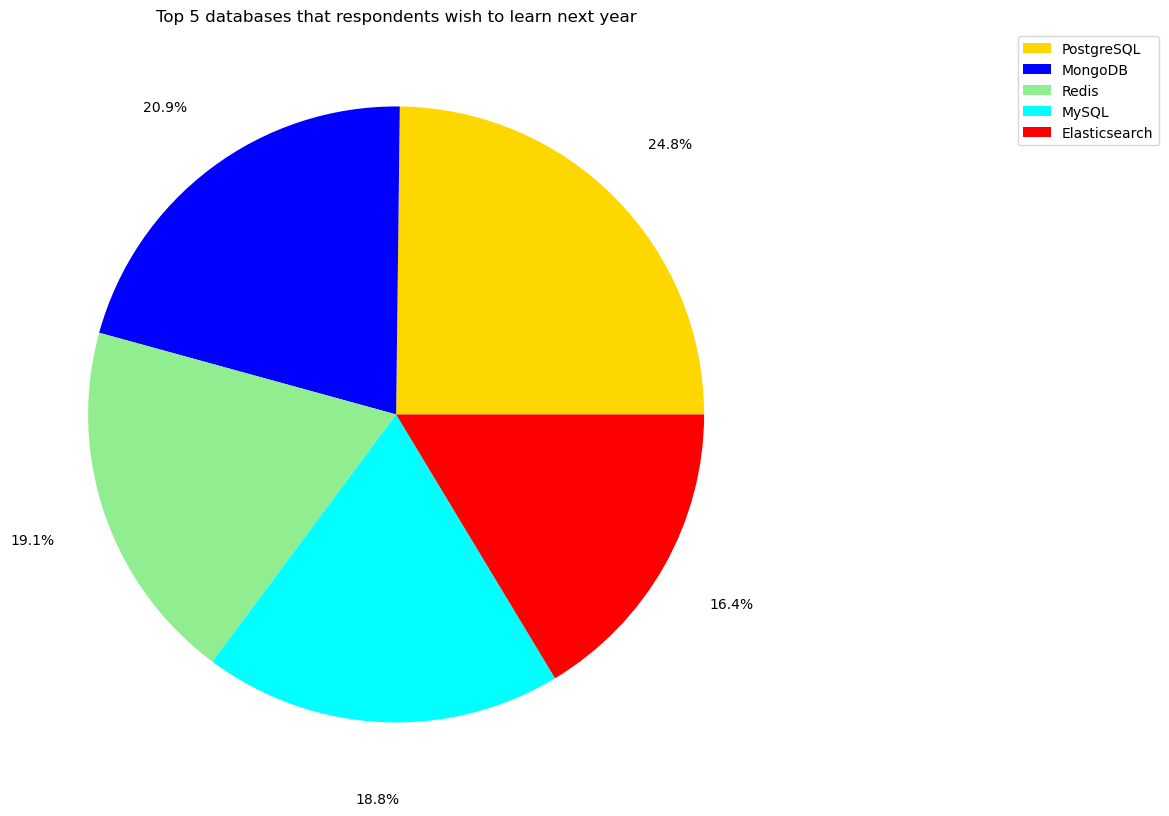

In [77]:
# your code goes here
QUERY = """
SELECT DatabaseDesireNextYear,COUNT(*) as count 
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count desc limit 5
"""
df_pie = pd.read_sql_query(QUERY,conn)
df_pie.head()
db = list(df_pie.DatabaseDesireNextYear)

#Plot
fig,ax=plt.subplots(figsize=(10, 10))
ax.pie(df_pie['count'], colors = ['gold','blue','lightgreen','cyan','red'],
        autopct='%1.1f%%', pctdistance=1.25)

# Ensure pie is drawn as a circle
ax.set_aspect('equal')  

plt.title('Top 5 databases that respondents wish to learn next year')
ax.legend(db,bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


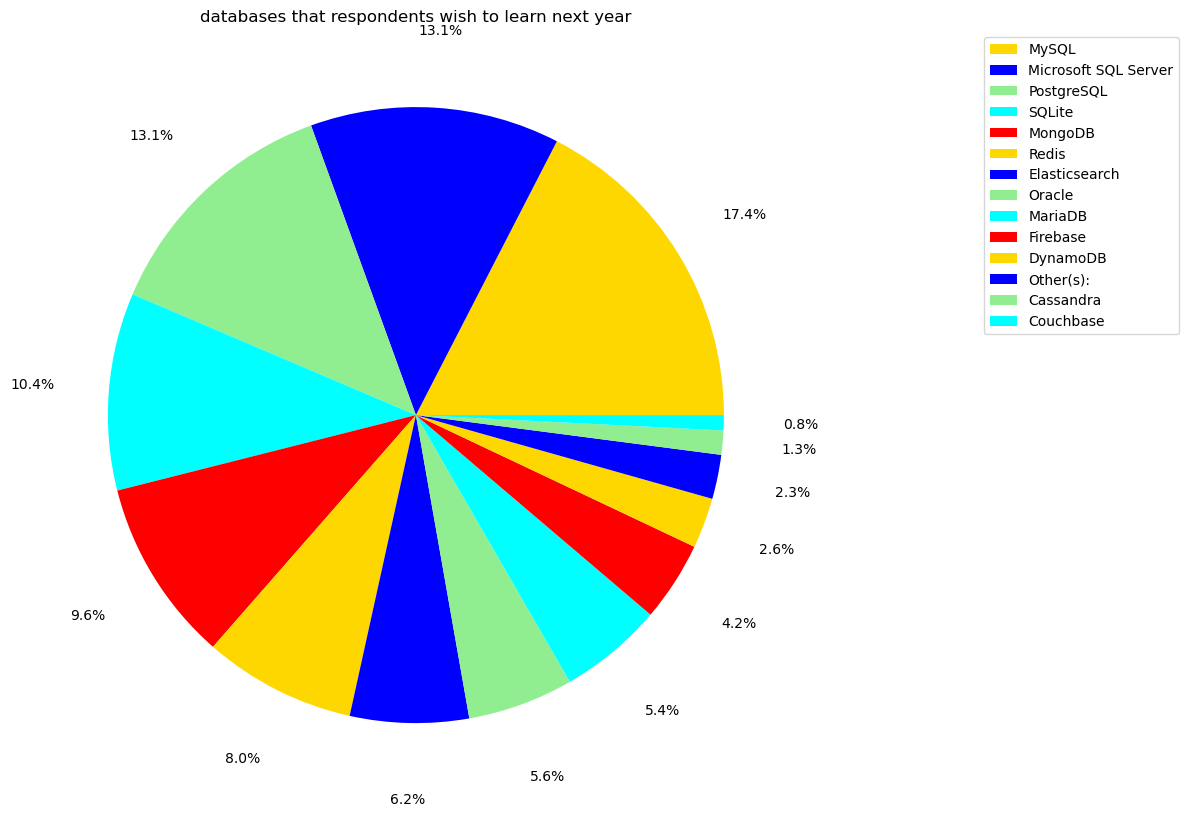

In [76]:
# your code goes here
QUERY = """
SELECT DatabaseWorkedWith,COUNT(*) as count 
FROM DatabaseWorkedWith
group by DatabaseWorkedWith
order by count desc
"""
df_pie2 = pd.read_sql_query(QUERY,conn)
db2 = list(df_pie2.DatabaseWorkedWith)

#Plot
fig,ax=plt.subplots(figsize=(10, 10))
ax.pie(df_pie2['count'], colors = ['gold','blue','lightgreen','cyan','red'],
        autopct='%1.1f%%', pctdistance=1.25)

# Ensure pie is drawn as a circle
ax.set_aspect('equal')  

plt.title('databases that respondents wish to learn next year')
ax.legend(db2,bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


In [85]:
# your code goes here
QUERY = """
SELECT DISTINCT (DatabaseWorkedWith),COUNT(*) as count 
FROM DatabaseWorkedWith
WHERE DatabaseWorkedWith == 'MySQL'
"""
df_pie3 = pd.read_sql_query(QUERY,conn)
df_pie3.head()

DatabaseWorkedWith  count
0              MySQL   5469

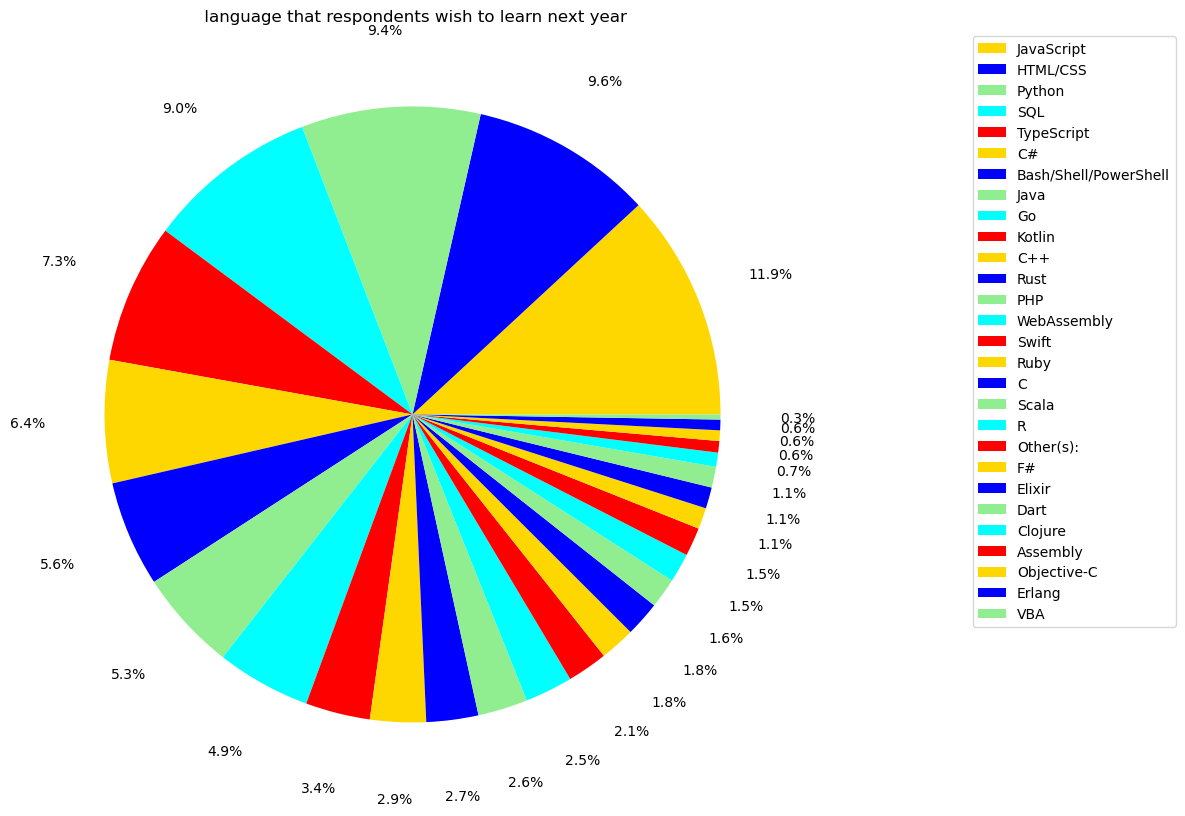

In [74]:
# your code goes here
QUERY = """
SELECT LanguageDesireNextYear,COUNT(*) as count 
FROM LanguageDesireNextYear
group by LanguageDesireNextYear
order by count desc 
"""
df_pie1 = pd.read_sql_query(QUERY,conn)
df_pie1.head()
db1 = list(df_pie1.LanguageDesireNextYear)

#Plot
fig,ax=plt.subplots(figsize=(10, 10))
ax.pie(df_pie1['count'], colors = ['gold','blue','lightgreen','cyan','red'],
        autopct='%1.1f%%', pctdistance=1.25)

# Ensure pie is drawn as a circle
ax.set_aspect('equal')  

plt.title(' languages that respondents wish to learn next year')
ax.legend(db1,bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


In [78]:
# your code goes here
QUERY = """
SELECT LanguageWorkedWith,COUNT(*) as count 
FROM LanguageWorkedWith
WHERE LanguageWorkedWith = "SQL"

"""
df_pie1 = pd.read_sql_query(QUERY,conn)
df_pie1.head()



LanguageWorkedWith  count
0                SQL   7106

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '30.0'),
  Text(1, 0, '31.0'),
  Text(2, 0, '32.0'),
  Text(3, 0, '33.0'),
  Text(4, 0, '34.0'),
  Text(5, 0, '35.0')])

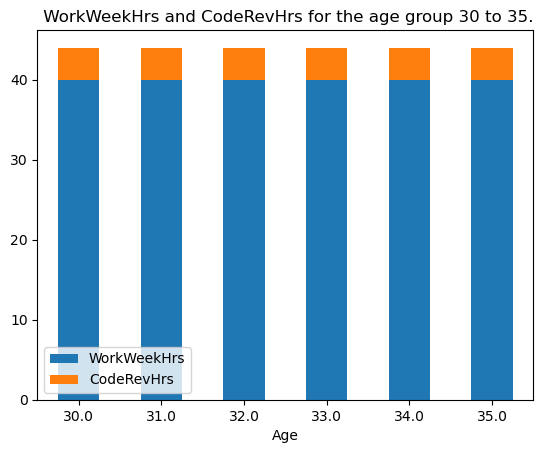

In [62]:
# your code goes here
QUERY = """
SELECT WorkWeekHrs,CodeRevHrs, Age
FROM master
WHERE Age BETWEEN 30 AND 35
"""
df_stackedchart = pd.read_sql_query(QUERY,conn)
Stack_data = df_stackedchart.groupby('Age')['WorkWeekHrs', 'CodeRevHrs'].median()

#Plot 
Stack_data.plot(kind='bar', stacked=True)
plt.title(' WorkWeekHrs and CodeRevHrs for the age group 30 to 35.')
plt.xticks(rotation=0, ha='center')

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


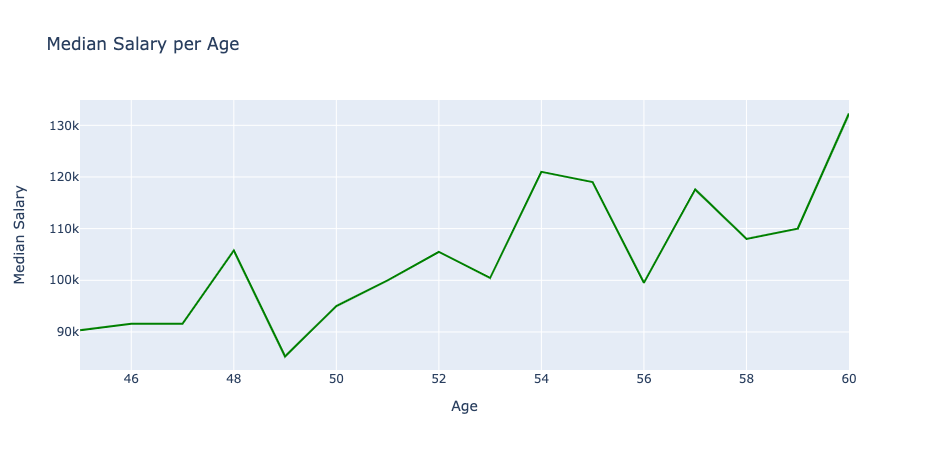

In [49]:
# your code goes here

QUERY = """
SELECT ConvertedComp,Age
FROM master
WHERE Age BETWEEN 45 AND 60
"""
df_linechart = pd.read_sql_query(QUERY,conn)

line_data = df_linechart.groupby('Age')['ConvertedComp'].median().reset_index()
line_data.head()

fig=go.Figure()
fig.add_trace(go.Scatter(x=line_data['Age'], y=line_data['ConvertedComp'], mode='lines', marker=dict(color='green')))
# Create line plot
## Here we update these values under function attributes such as title,xaxis_title and yaxis_title
fig.update_layout(title='Median Salary per Age', xaxis_title='Age', yaxis_title='Median Salary')
fig.show()



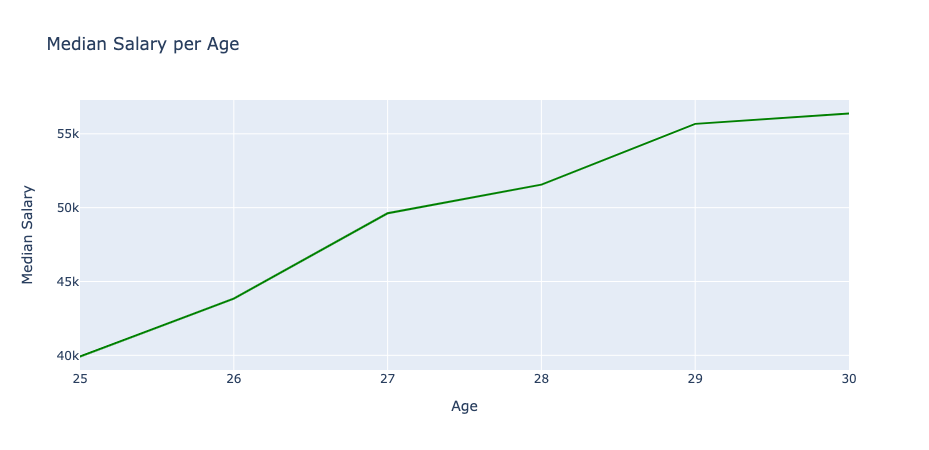

In [90]:
# your code goes here
# Age 25 to 30

QUERY = """
SELECT ConvertedComp,Age
FROM master
WHERE Age BETWEEN 25 AND 30
"""
df_linechart = pd.read_sql_query(QUERY,conn)

line_data = df_linechart.groupby('Age')['ConvertedComp'].median().reset_index()
line_data.head()

fig=go.Figure()
fig.add_trace(go.Scatter(x=line_data['Age'], y=line_data['ConvertedComp'], mode='lines', marker=dict(color='green')))
# Create line plot
## Here we update these values under function attributes such as title,xaxis_title and yaxis_title
fig.update_layout(title='Median Salary per Age', xaxis_title='Age', yaxis_title='Median Salary')
fig.show()



### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


Text(0, 0.5, 'MainBranch')

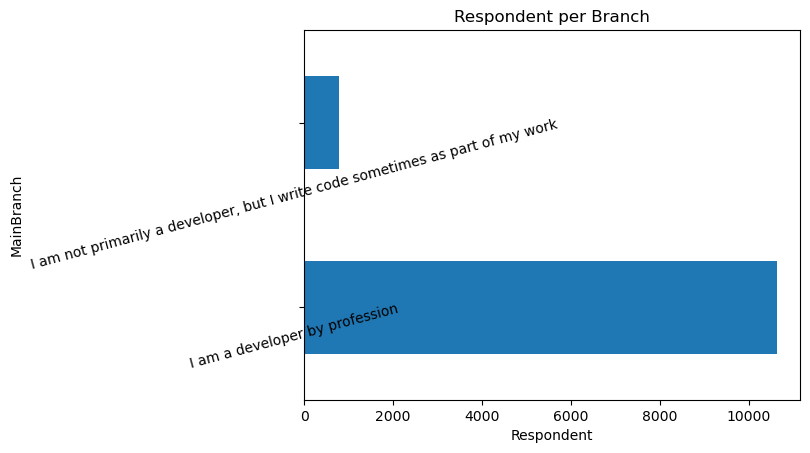

In [40]:
# your code goes here

df['MainBranch'].value_counts().plot(kind='barh')
plt.yticks(rotation=15, horizontalalignment="center")
plt.title("Respondent per Branch")
plt.xlabel("Respondent")
plt.ylabel("MainBranch")

Close the database connection.


In [67]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
